In [175]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

users = pd.read_csv('users.csv')
submissions = pd.read_csv('submissions.csv')
problems = pd.read_csv('problems.csv')

submissions['ts'] = pd.to_datetime(submissions['ts'])
users['last_ac'] = pd.to_datetime(users['last_ac'])

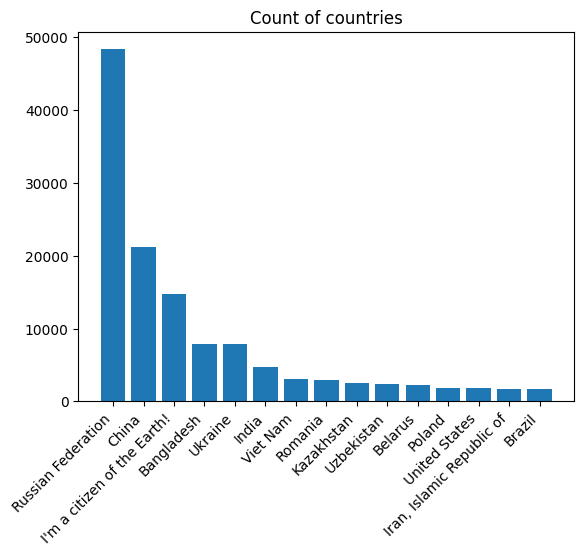

In [176]:
from collections import Counter

countries = Counter(users['country']).most_common(15)
countries, cnt = zip(*countries)

plt.bar(countries, cnt)
plt.xticks(rotation=45, ha="right")
plt.title('Count of countries')
plt.show()

In [177]:
leaderboard = users.sort_values('rank')

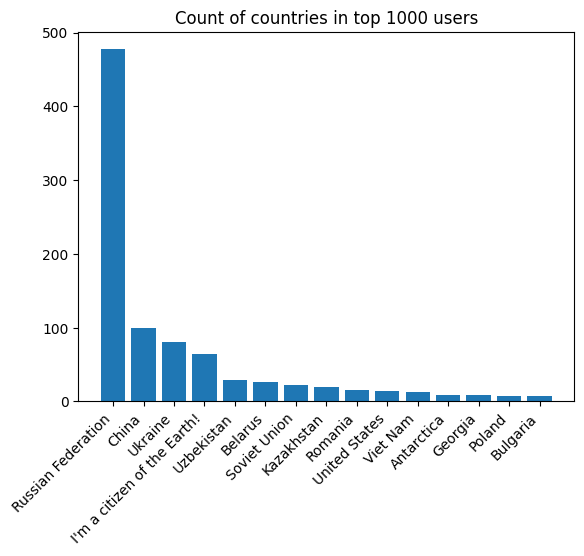

In [178]:
countries = Counter(leaderboard.head(1000)['country']).most_common(15)
countries, cnt = zip(*countries)

plt.bar(countries, cnt)
plt.xticks(rotation=45, ha="right")
plt.title('Count of countries in top 1000 users')
plt.show()

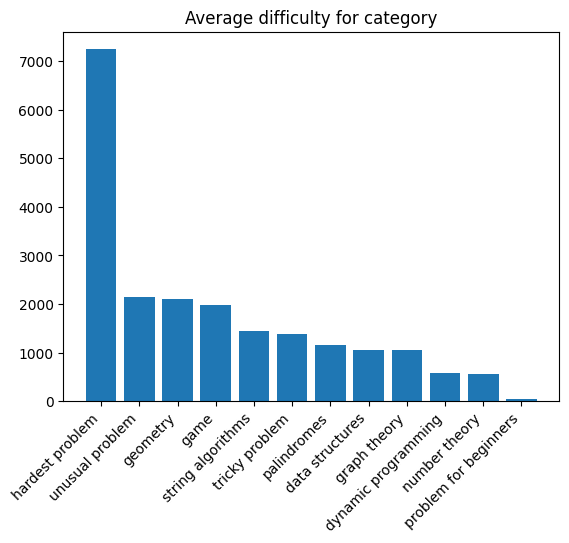

In [179]:
tags = list(pd.unique(problems['tag']))
tags.remove('none')
def average_difficulty_for_tag(tag):
    return problems[problems['tag'] == tag]['difficulty'].mean()

tags.sort(key=average_difficulty_for_tag, reverse=True)

plt.bar(tags, list(map(average_difficulty_for_tag, tags)))
plt.xticks(rotation=45, ha="right")
plt.title('Average difficulty for category')
plt.show()

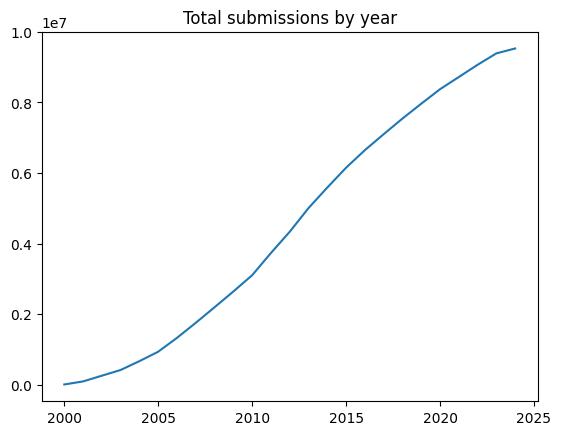

In [181]:
year = range(2000, 2025)
cnt = list(submissions.groupby(submissions['ts'].dt.year)['ts'].count().cumsum())

plt.plot(year, cnt)
plt.title('Total submissions by year')
plt.show()

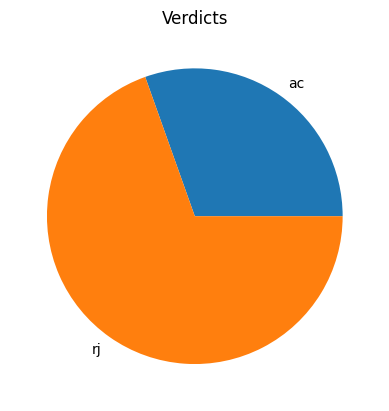

In [182]:
verdicts = pd.unique(submissions['verdict'])
cnt = [submissions[submissions['verdict'] == verdict]['verdict'].count() for verdict in verdicts]

plt.title('Verdicts')
plt.pie(cnt, labels=verdicts)
plt.show()

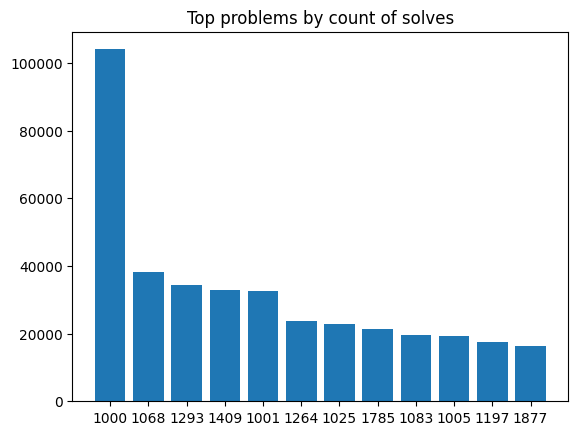

In [183]:
groupped = submissions[submissions['verdict'] == 'ac'].groupby(submissions['problem_id'])['user_id'].unique()
problems_stats = sorted(groupped.items(), key=lambda x: len(x[1]), reverse=True)[:12]


problem_id, users_solved = zip(*problems_stats)
users_solved = list(map(len, users_solved))
problem_id = list(map(str, problem_id))

plt.bar(problem_id, users_solved)
plt.title('Top problems by count of solves')
plt.show()